In [20]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    
    kfold_data = []
    non_divide = False
    re = 0
    if x_train.shape[0] % k != 0 : 
        re = x_train.shape[0] % k
        non_divide = True

    v_index = [i for i in range(int(x_train.shape[0]))]
    np.random.seed(100)
    np.random.shuffle(v_index)
    valid_index_size = int(x_train.shape[0] // k)

    now = 0
    for i in range(k) :
        if non_divide :
            if i < re:
                start, end = now, now+valid_index_size+1
                valid_index = v_index[start:end]

                indices = list(range(0, start)) + list(range(end, len(x_train)))
                
                test_index = np.asarray(v_index[0:start] + v_index[end: len(x_train)])
                kfold_data.append(np.asarray([test_index, valid_index]))
                now = end
            else :
                start, end = now, now+valid_index_size
                valid_index = np.asarray(v_index[start:end])

                indices = list(range(0, start)) + list(range(end, len(x_train)))
                ttest_index = np.asarray(v_index[0:start] + v_index[end: len(x_train)])
                kfold_data.append(np.asarray([test_index, valid_index]))
                now = end
        else :
            start, end = now, now+valid_index_size
            valid_index = np.asarray(v_index[start:end])
            # print(len(valid_index))
            indices = list(range(0, start)) + list(range(end, len(x_train)))
            test_index = np.asarray(v_index[0:start] + v_index[end: len(x_train)])
            kfold_data.append(np.asarray([test_index, valid_index]))
            # print(kfold_data[i][1][0])
            now = end
    return kfold_data

In [8]:
kfold_data = cross_validation(x_train, y_train, k=10)
# print(kfold_data[9][0])
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K
# print(kfold_data[0])

## example

In [9]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  2  3  4  5  6  7  8 10 11 12 13 15 16 18 19], Validation index: [ 0  9 14 17]
Split: 2, Training index: [ 0  1  2  4  5  7  8  9 10 11 12 14 15 17 18 19], Validation index: [ 3  6 13 16]
Split: 3, Training index: [ 0  1  3  4  5  6  7  9 11 12 13 14 15 16 17 19], Validation index: [ 2  8 10 18]
Split: 4, Training index: [ 0  1  2  3  6  7  8  9 10 13 14 15 16 17 18 19], Validation index: [ 4  5 11 12]
Split: 5, Training index: [ 0  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18], Validation index: [ 1  7 15 19]


In [10]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [11]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [12]:
## your code
kfold_data = cross_validation(x_train, y_train, k=5)

C = [0.1, 1, 10, 100, 1000, 10000, 100000]
gamma = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
score = []
best_acc = -1.0
best_C = 0.0
best_gamma = 0.0

for c in C:
    temp = []
    for ga in gamma :
        clf = SVC(C=c, kernel='rbf', gamma=ga)
        acc = 0
        for i in range(len(kfold_data)):
            # print(i)
            train_x = x_train[kfold_data[i][0]]
            train_y = y_train[kfold_data[i][0]]
            clf.fit(train_x, train_y)
            # print(clf.support_vectors_)
            # print(clf.n_features_in_)
            y_pred = clf.predict(x_train[kfold_data[i][1]])
            y = y_train[kfold_data[i][1]]
            # print(accuracy_score(y, y_pred))
            acc += accuracy_score(y, y_pred)
        
        acc /= 5
        if best_acc < acc :
            best_acc = acc
            best_C = c
            best_gamma = ga
        temp.append(acc)

    score.append(temp)


In [13]:
# print(best_C)
# print(best_gamma)
print(best_acc)
best_parameters = [best_C, best_gamma]
print(best_parameters)

0.9932857142857143
[10, 0.0001]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

<Figure size 1500x1000 with 0 Axes>

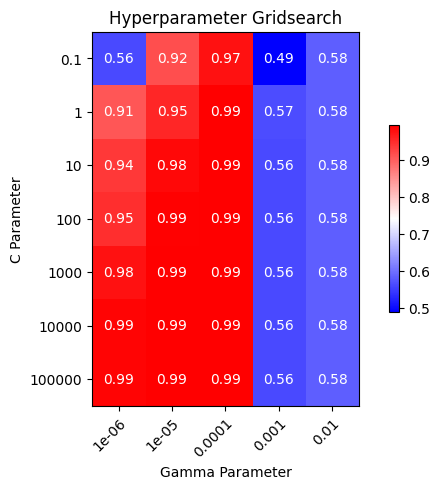

In [38]:
plt.figure(figsize=(15, 10))

fig, ax = plt.subplots()
im = ax.imshow(score, cmap="bwr")

cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5 )

# Show all ticks and label them with the respective x list and y list
ax.set_yticks(np.arange(len(C)))
ax.set_xticks(np.arange(len(gamma)))
ax.set_yticklabels(C)
ax.set_xticklabels(gamma)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over score and create text 
valfmt = matplotlib.ticker.StrMethodFormatter("{x:.2f}")
for i in range(len(C)):
    for j in range(len(gamma)):
        text = ax.text(j, i, valfmt(score[i][j], None),
                       ha="center", va="center", color="w")

ax.set_title("Hyperparameter Gridsearch")
fig.tight_layout()
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [ ]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])

y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))